Basic Statistics:

    Total Kills (K) per player. (By scope, by side, ) 
    Total Deaths (D) per player.
    Kill/Death ratio (K/D) per player.
    Average Combat Score (ACS) per player.
    Average Damage per Round (ADR) per player.

Performance Metrics:

    Headshot Percentage (HS%) per player.
    First Kills (FK) and First Deaths (FD) counts and ratios.
    Kill/Death difference (+/-) per player.
    Kill/Death difference in pistol rounds (+/-) per player.

Agent-Specific Metrics:

    Agent popularity and performance analysis.
    Win rates and performance on specific maps for each agent.

Team Performance:

    Total team Kills, Deaths, and K/D ratio.
    Team Average Combat Score (ACS) and Average Damage per Round (ADR).
    Team First Kills (FK) and First Deaths (FD) counts and ratios.

Map Performance:

    Individual player performance on each map.
    Team performance on each map.
    Win rates on each map.

Stage and Series Analysis:

    Performance in different stages (e.g., Playoffs, Grand Final).
    Series-level statistics and win rates.

Comparative Analysis:

    Compare individual player statistics against the team average.
    Compare agent performance across players.

Trend Analysis:

    Analyze how player performance changes over different maps or series.
    Identify trends in individual player K/D ratios.

Impact Analysis:

    Assess the impact of individual player performance on team success.


In [1]:
import pandas as pd
import ast

data = pd.read_csv('champions-tour-2024-pacific-kickoff_data\economy_data_champions-tour-2024-pacific-kickoff.csv')
general = pd.read_csv('champions-tour-2024-pacific-kickoff_data\general_data_champions-tour-2024-pacific-kickoff.csv')


In [47]:
list(set(general['Team Name']))

['Paper Rex',
 'T1',
 'DetonatioN FocusMe',
 'Talon Esports',
 'Rex Regum Qeon',
 'Team Secret',
 'Global Esports',
 'ZETA DIVISION',
 'BLEED',
 'DRX',
 'Gen.G']

In [2]:
# (id, map#, Team) : {'Killjoy','Jett',...}

,Player Name,Agent Name,R,ACS,K,D,K/D +/–,+/–,ADR,HS%,...,FK/FD +/–,+/–.1,Team Name,Map Name,Map #,Stage,Series,winner,Id,rounds
0,Carpe,Fade,1.47\n1.23\n1.89,294\n247\n374,20\n10\n10,\n\n10\n6\n4\n\n,8\n6\n2,+10\n+4\n+6,187\n159\n237,20%\n20%\n20%,...,0\n0\n0,+3\n+1\n+2,T1,Lotus,2,Group Stage,Opening (A),T1,0,"1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0..."
1,Rossy,Viper,1.41\n1.29\n1.61,270\n232\n337,16\n10\n6,\n\n13\n6\n7\n\n,13\n3\n10,+3\n+4\n-1,170\n136\n229,13%\n12%\n15%,...,1\n1\n0,+3\n0\n+3,T1,Lotus,2,Group Stage,Opening (A),T1,0,"1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0..."
2,iZu,Omen,1.20\n1.27\n1.08,229\n257\n182,17\n12\n5,\n\n12\n7\n5\n\n,9\n2\n7,+5\n+5\n0,151\n159\n137,39%\n33%\n56%,...,2\n2\n0,0\n0\n0,T1,Lotus,2,Group Stage,Opening (A),T1,0,"1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0..."
3,xccurate,Chamber,1.04\n1.12\n0.89,187\n210\n148,14\n9\n5,\n\n10\n7\n3\n\n,2\n2\n0,+4\n+2\n+2,117\n139\n78,17%\n11%\n40%,...,1\n1\n0,-1\n-1\n0,T1,Lotus,2,Group Stage,Opening (A),T1,0,"1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0..."
4,Sayaplayer,Raze,0.54\n0.58\n0.48,126\n122\n133,8\n5\n3,\n\n14\n8\n6\n\n,4\n3\n1,-6\n-3\n-3,92\n85\n106,35%\n22%\n63%,...,4\n3\n1,-2\n-2\n0,T1,Lotus,2,Group Stage,Opening (A),T1,0,"1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0..."


In [2]:
data = general
# for each Id : we want to look in the map#
d = {id_match : {map_match : {team_name : set(data[(data['Id'] == id_match) & (data['Map Name'] == map_match) & (data['Team Name'] == team_name)]['Agent Name']) for team_name in set(data[(data['Id'] == id_match) & (data['Map Name'] == map_match)]['Team Name'])} for map_match in set(data[data['Id'] == id_match]['Map Name'])} for id_match in set(data["Id"])}

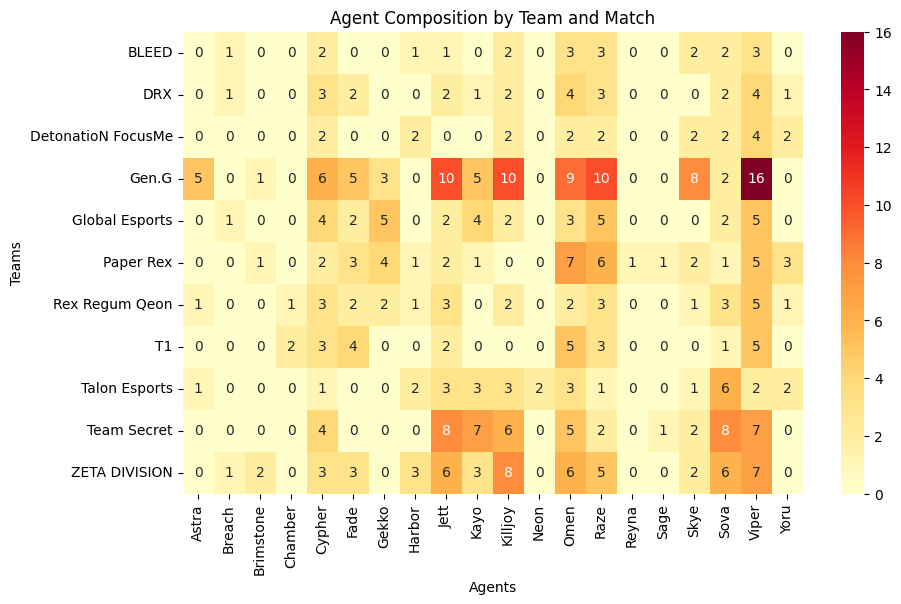

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extracting teams and agents
teams = set()
agents = set()
for match in d.values():
    for map_name, map_data in match.items():
        for team_name, agents_set in map_data.items():
            teams.add(team_name)
            agents.update(agents_set)

# Mapping agents to indices
agent_to_index = {agent: i for i, agent in enumerate(sorted(agents))}
team_to_index = {team: i for i, team in enumerate(sorted(teams))}

# Create empty heatmap matrix
heatmap_matrix = np.zeros((len(teams), len(agents)))

# Fill in the heatmap matrix
for match in d.values():
    for map_data in match.values():
        for team_name, agents_set in map_data.items():
            for agent in agents_set:
                heatmap_matrix[team_to_index[team_name], agent_to_index[agent]] += 1

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_matrix, cmap="YlOrRd", annot=True, fmt=".0f", xticklabels=sorted(agents), yticklabels=sorted(teams))
plt.xlabel('Agents')
plt.ylabel('Teams')
plt.title('Agent Composition by Team and Match')
plt.show()

In [4]:
def calculate_composition_for_each_team(data, map_to_select=None):
    
    if map_to_select:
        data = data[data['Map Name'] == map_to_select]
    
    summary = {id_match : {map_match : {team_name : set(data[(data['Id'] == id_match) & (data['Map Name'] == map_match) & (data['Team Name'] == team_name)]['Agent Name']) for team_name in set(data[(data['Id'] == id_match) & (data['Map Name'] == map_match)]['Team Name'])} for map_match in set(data[data['Id'] == id_match]['Map Name'])} for id_match in set(data["Id"])}

    teams = set()
    agents = set()

    for match in summary.values():
        for map_name, map_data in match.items():
            for team_name, agents_set in map_data.items():
                teams.add(team_name)
                agents.update(agents_set)

    # Mapping agents to indices
    agent_to_index = {agent: i for i, agent in enumerate(sorted(agents))}
    team_to_index = {team: i for i, team in enumerate(sorted(teams))}

    # Create empty heatmap matrix
    heatmap_matrix = np.zeros((len(teams), len(agents)))

    # Fill in the heatmap matrix
    for match in summary.values():
        for map_data in match.values():
            for team_name, agents_set in map_data.items():
                for agent in agents_set:
                    heatmap_matrix[team_to_index[team_name], agent_to_index[agent]] += 1
    
    return heatmap_matrix

In [17]:
hea_m = calculate_composition_for_each_team(general, 'Lotus')

In [45]:
dictionnary.keys()


dict_keys(['astra', 'breach', 'brimstone', 'chamber', 'cypher', 'deadlock', 'fade', 'gekko', 'harbor', 'iso', 'jett', 'kayo', 'killjoy', 'neon', 'omen', 'phoenix', 'raze', 'reyna', 'sage', 'skye', 'sova', 'viper', 'yoru'])

In [14]:
sorted_logos[0]

array([[[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

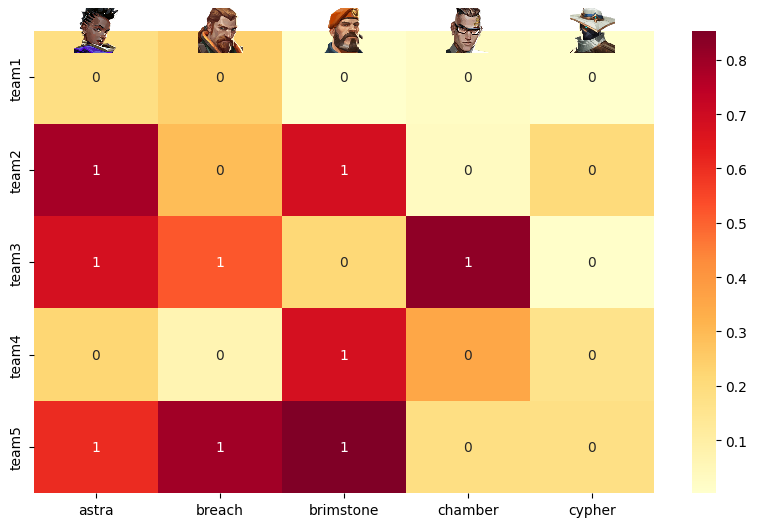

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Sample data
hea_m = calculate_composition_for_each_team(general, 'Lotus')
agents = ['astra', 'breach', 'brimstone', 'chamber', 'cypher', 'deadlock', 'fade', 'gekko', 'harbor', 'iso', 'jett', 'kayo', 'killjoy', 'neon', 'omen', 'phoenix', 'raze', 'reyna', 'sage', 'skye', 'sova', 'viper', 'yoru']
teams = ['Paper Rex',
 'T1',
 'DetonatioN FocusMe',
 'Talon Esports',
 'Rex Regum Qeon',
 'Team Secret',
 'Global Esports',
 'ZETA DIVISION',
 'BLEED',
 'DRX',
 'Gen.G']

# Sample agent logo dictionary
agent_logos = {'astra': './app/icon/Personnage/astra.png',
 'breach': './app/icon/Personnage/breach.png',
 'brimstone': './app/icon/Personnage/brimstone.png',
 'chamber': './app/icon/Personnage/chamber.png',
 'cypher': './app/icon/Personnage/cypher.png',
 'deadlock': './app/icon/Personnage/deadlock.png',
 'fade': './app/icon/Personnage/fade.png',
 'gekko': './app/icon/Personnage/gekko.png',
 'harbor': './app/icon/Personnage/harbor.png',
 'iso': './app/icon/Personnage/iso.png',
 'jett': './app/icon/Personnage/jett.png',
 'kayo': './app/icon/Personnage/kayo.png',
 'killjoy': './app/icon/Personnage/killjoy.png',
 'neon': './app/icon/Personnage/neon.png',
 'omen': './app/icon/Personnage/omen.png',
 'phoenix': './app/icon/Personnage/phoenix.png',
 'raze': './app/icon/Personnage/raze.png',
 'reyna': './app/icon/Personnage/reyna.png',
 'sage': './app/icon/Personnage/sage.png',
 'skye': './app/icon/Personnage/skye.png',
 'sova': './app/icon/Personnage/sova.png',
 'viper': './app/icon/Personnage/viper.png',
 'yoru': './app/icon/Personnage/yoru.png'}

# Plot heatmap
plt.figure(figsize=(10, 6))

# Plot heatmap
ax = sns.heatmap(hea_m, cmap="YlOrRd", annot=True, fmt=".0f", xticklabels=agents, yticklabels=teams)

# Replace x-axis labels with logos
for i, agent in enumerate(sorted(agents)):
    logo_path = agent_logos.get(agent)
    if logo_path:
        # Read the logo image
        img = plt.imread(logo_path)
        
        # Define the position of the logo
        x_pos = i + 0.5
        
        # Add the logo to the plot
        imagebox = OffsetImage(img, zoom=0.25)  # Adjust the zoom factor to increase logo size
        ab = AnnotationBbox(imagebox, (x_pos, 0), frameon=False, pad=0)
        ax.add_artist(ab)


# Show the plot
plt.show()

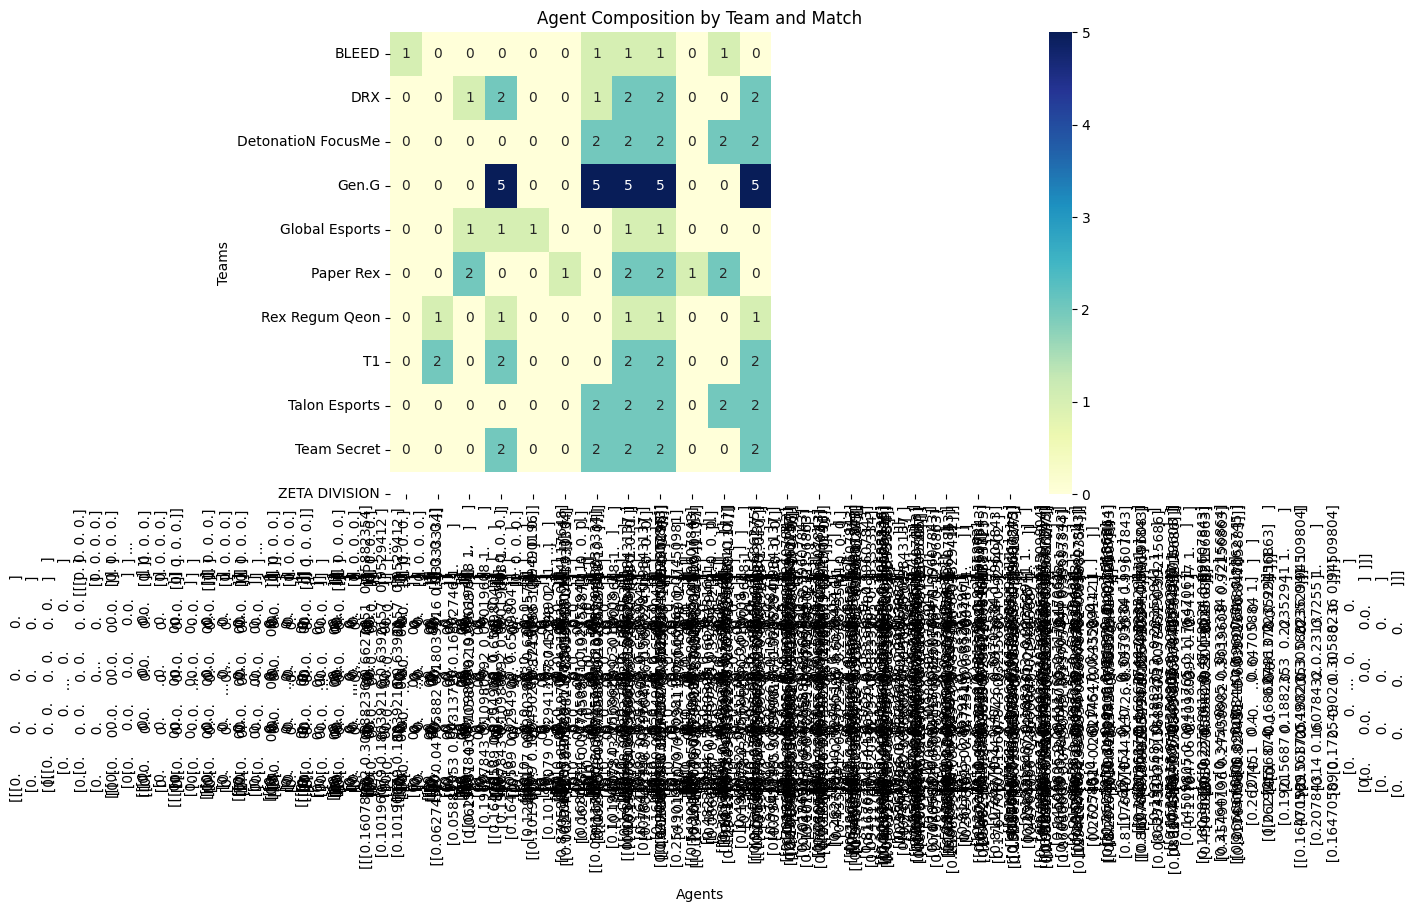

In [10]:
# Plotting the heatmap
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sorted_logos = [mpimg.imread(dictionnary[agent.lower()]) for agent in sorted(agents)]
plt.figure(figsize=(10, 6))
sns.heatmap(hea_m, cmap="YlGnBu", annot=True, fmt=".0f", xticklabels=sorted(agents), yticklabels=sorted(teams))
plt.xlabel('Agents')
plt.ylabel('Teams')
plt.title('Agent Composition by Team and Match')
plt.show()

In [6]:
# creating the dictionnary
import os

folder_path = "./app/icon/Personnage"  # Replace this with the path to your folder

# List all files in the folder
files = os.listdir(folder_path)

list_names = []
# Print the names of all files
for file in files:
    list_names.append(file.split('.')[0])

In [7]:
dictionnary = {element:"./app/icon/Personnage/"+element+".png" for element in list_names}

dictionnary

{'astra': './app/icon/Personnage/astra.png',
 'breach': './app/icon/Personnage/breach.png',
 'brimstone': './app/icon/Personnage/brimstone.png',
 'chamber': './app/icon/Personnage/chamber.png',
 'cypher': './app/icon/Personnage/cypher.png',
 'deadlock': './app/icon/Personnage/deadlock.png',
 'fade': './app/icon/Personnage/fade.png',
 'gekko': './app/icon/Personnage/gekko.png',
 'harbor': './app/icon/Personnage/harbor.png',
 'iso': './app/icon/Personnage/iso.png',
 'jett': './app/icon/Personnage/jett.png',
 'kayo': './app/icon/Personnage/kayo.png',
 'killjoy': './app/icon/Personnage/killjoy.png',
 'neon': './app/icon/Personnage/neon.png',
 'omen': './app/icon/Personnage/omen.png',
 'phoenix': './app/icon/Personnage/phoenix.png',
 'raze': './app/icon/Personnage/raze.png',
 'reyna': './app/icon/Personnage/reyna.png',
 'sage': './app/icon/Personnage/sage.png',
 'skye': './app/icon/Personnage/skye.png',
 'sova': './app/icon/Personnage/sova.png',
 'viper': './app/icon/Personnage/viper.png',


Test bank and economy

In [ ]:
import ast
import numpy as np

resulta = list(set(argent.loc[argent['Team Name'] == 'GEN', ['Stage', 'Series', 'Team Name']].apply(lambda x: (x['Stage'],x['Series']), axis=1)))
resultb = list(set(argent.loc[argent['Team Name'] == 'PRX', ['Stage', 'Series', 'Team Name']].apply(lambda x: (x['Stage'],x['Series']), axis=1)))
# argent[argent['Team Name'] == 'T1']['Buys'].apply(lambda x: np.mean(ast.literal_eval(x)))

In [ ]:
stage = 'Playoffs'
series = 'Semifinals'
map_name = 'Ascent'
team = ['PRX', 'GEN']
bank_a = ast.literal_eval(data.loc[(data['Stage'] == stage) & (data['Series'] == series) & (data['Map Name'] == map_name) & (data['Team Name'] == team[1])]['Bank'].values[0])
buys_a = ast.literal_eval(data.loc[(data['Stage'] == stage) & (data['Series'] == series) & (data['Map Name'] == map_name) & (data['Team Name'] == team[1])]['Buys'].values[0])

In [4]:
data.loc[(data['Stage'] == stage) & (data['Series'] == series) & (data['Map Name'] == map_name)]

,Team Name,Map #,Map Name,Stage,Series,Pistol_Won,Eco,Eco_Won,$,$_Won,$$,$$_Won,$$$,$$$_Won,Bank,Buys
78,T1,2,Ascent,Playoffs,Semifinals,2,4,2,1,0,7,2,7,2,"[100, 600, 9200, 900, 6600, 2500, 10900, 3800,...","[3900, 16400, 2400, 20600, 11200, 19900, 7600,..."
79,PRX,2,Ascent,Playoffs,Semifinals,0,3,1,0,0,4,4,12,8,"[100, 1700, 7900, 17000, 20900, 27000, 33100, ...","[4100, 11100, 16700, 22500, 26000, 26100, 2610..."


In [ ]:
team = ['RRQ', 'ZETA']
argent.loc[(argent['Team Name'] == team[0]) & (argent['Team Name'] == team[1]), ['Stage', 'Series', 'Team Name']]

In [15]:
stage = 'Group Stage'
series = 'Opening (C)'
map_name = 'Icebox'
team = ['RRQ', 'ZETA']
import ast
argent.loc[(argent['Series'] == series)]

,Team Name,Map #,Map Name,Stage,Series,Pistol_Won,Eco,Eco_Won,$,$_Won,$$,$$_Won,$$$,$$$_Won,Bank,Buys
4,GEN,1,Icebox,Group Stage,Opening (C),1,4,1,2,2,5,3,13,7,"[400, 8100, 500, 7000, 3700, 8300, 10100, 2130...","[3700, 4100, 20500, 9900, 23300, 7300, 23600, ..."
5,RRQ,1,Icebox,Group Stage,Opening (C),1,3,1,1,0,5,4,15,6,"[200, 1800, 13000, 10900, 6000, 11700, 3200, 7...","[3600, 15700, 14200, 22500, 16600, 22000, 1910..."
6,GEN,2,Split,Group Stage,Opening (C),1,3,1,1,0,8,4,12,6,"[100, 7500, 900, 7000, 2300, 7400, 5800, 3900,...","[4300, 3000, 20700, 11500, 20500, 10400, 19600..."
7,RRQ,2,Split,Group Stage,Opening (C),1,3,1,1,0,9,4,11,8,"[0, 3900, 13700, 11100, 12100, 16100, 17000, 1...","[3700, 13600, 13200, 21300, 20700, 21200, 2200..."
8,GEN,3,Sunset,Group Stage,Opening (C),1,3,1,0,0,5,3,13,9,"[0, 7600, 1300, 9900, 7600, 13400, 3900, 6800,...","[4000, 3300, 19500, 20400, 21300, 23400, 20300..."
9,RRQ,3,Sunset,Group Stage,Opening (C),1,3,1,1,0,10,4,7,3,"[200, 3500, 10900, 2200, 7700, 5000, 8000, 820...","[3800, 15500, 12500, 19500, 9000, 20300, 21500..."


In [11]:
argent.loc[argent['Stage'] == stage]

,Team Name,Map #,Map Name,Stage,Series,Pistol_Won,Eco,Eco_Won,$,$_Won,$$,$$_Won,$$$,$$$_Won,Bank,Buys
0,T1,1,Breeze,Group Stage,Opening (A),0,4,0,2,0,5,3,23,15,"[400, 8600, 300, 6900, 2800, 9000, 3800, 1400,...","[3800, 2700, 21000, 22300, 16600, 9500, 23900,..."
1,BLD,1,Breeze,Group Stage,Opening (A),2,2,2,0,0,9,4,23,10,"[300, 2800, 15400, 2200, 4300, 7000, 16100, 22...","[3800, 16500, 17900, 24200, 22700, 23600, 2540..."
2,T1,2,Lotus,Group Stage,Opening (A),2,2,2,1,0,5,4,11,7,"[300, 2600, 9000, 9700, 17800, 6800, 9300, 103...","[3900, 17200, 19200, 24300, 25400, 24900, 2620..."
3,BLD,2,Lotus,Group Stage,Opening (A),0,3,0,1,0,7,1,8,5,"[300, 8700, 900, 7300, 1000, 10000, 1200, 6300...","[3800, 2300, 21200, 11600, 23300, 23500, 19200..."
4,GEN,1,Icebox,Group Stage,Opening (C),1,4,1,2,2,5,3,13,7,"[400, 8100, 500, 7000, 3700, 8300, 10100, 2130...","[3700, 4100, 20500, 9900, 23300, 7300, 23600, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,TS,2,Ascent,Group Stage,Decider (B),1,3,1,1,0,4,3,12,9,"[400, 8700, 600, 7800, 7200, 19200, 5500, 2900...","[3200, 2400, 20700, 23000, 23300, 24400, 24300..."
58,ZETA,1,Bind,Group Stage,Decider (A),1,3,1,1,1,3,3,14,8,"[200, 600, 6600, 18800, 22300, 29900, 35300, 1...","[3400, 17300, 18900, 19000, 24000, 24000, 2330..."
59,GE,1,Bind,Group Stage,Decider (A),1,3,1,1,0,10,5,7,2,"[400, 900, 13800, 7800, 5600, 2000, 2900, 6200...","[3500, 11100, 1300, 22500, 19300, 19500, 17600..."
60,ZETA,2,Lotus,Group Stage,Decider (A),2,2,2,0,0,3,3,11,8,"[200, 3300, 4900, 11900, 17300, 19100, 31100, ...","[3800, 17100, 20500, 23700, 23700, 23500, 2380..."


In [15]:
teams = set(argent['Team Name'])

banks_buys = {team : (round(np.mean(argent[argent['Team Name'] == team]['Bank'].apply(lambda x: np.mean(ast.literal_eval(x)))),2), round(np.mean(argent[argent['Team Name'] == team]['Buys'].apply(lambda x: np.mean(ast.literal_eval(x)))),2))for team in teams}